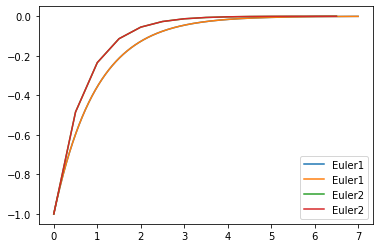

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Euler(function,x,pars,h):
    return x+h*function(x,*pars)
def function(x,d,u,alpha,gamma,b):
    res1=-d*x[0]+u*np.tanh(alpha*x[0]+gamma*x[1])+b
    res2=-d*x[1]+u*np.tanh(alpha*x[1]+gamma*x[0])+b
    return np.array([res1,res2])
def pars(d,u,alpha,gamma,b):
    return [d,u,alpha,gamma,b]
p=[1,0.31,1.2,-1.3,0]
h1=1e-3
h2=5e-1
x=[np.array([-1.,-1.])]
x1=[np.array([-1.,-1.])]
ts=np.arange(0,7,h1)
ts1=np.arange(0,7,h2)

for t in ts[1:]:
    x_new=Euler(function,x[-1],p,h1)
    x+=[x_new]
for t in ts1[1:]:
    x1_new=Euler(function,x1[-1],p,h2)
    x1+=[x1_new]    
plt.plot(ts,x,label='Euler1')
plt.plot(ts1,x1,label='Euler2')
plt.legend()
plt.show()


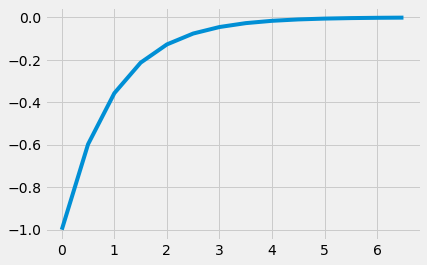

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_step(f, x, h, *args, **kwargs):
    k1 = f(x, *args, **kwargs)
    k2 = f(x + h/2*k1, *args, **kwargs)
    k3 = f(x + h/2*k2, *args, **kwargs)
    k4 = f(x + h*k3, *args, **kwargs)
    return x + h/6*(k1 + 2*k2 + 2*k3 + k4)

def rk4(f, x0, T, h, *args, **kwargs):
    x = np.zeros((*x0.shape, int(T/h)))
    i = 0
    x[..., i] = x0
    while i+1 < x.shape[-1]:
        x[..., i+1] = rk4_step(f, x[..., i], h, *args, **kwargs)
        i += 1
    t = np.arange(0, T, h)
    return t, x

def rhs(x1, alpha=1.2, gamma=-1.3, b=0, d=1, u=0.31):
    x, y, t = x1
    dx = -d*x + u*np.tanh(alpha*x+gamma*y)+b
    dy = -d*y + u*np.tanh(alpha*y+gamma*x) +b
    dt = 1
    return np.array([dx, dy, dt])

def f(u):
    ic = np.array([-1,-1,0])
    t, x1 = rk4(rhs, ic, T=7, h=0.5,u=u)
    x, y, t = x1
    plt.plot(t, x)
    plt.show()
f(0.31)